In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import SmoothBivariateSpline
from sklearn.impute import KNNImputer
from scipy.spatial import cKDTree
from scipy.interpolate import griddata
from mpl_toolkits.basemap import Basemap as mp

In [2]:
# Upload dataset
upwelling = pd.read_csv('upwelling_nonspatial.csv')

In [3]:
# define variables
date = pd.to_datetime(upwelling['date (string)'])
yes_upwelling = upwelling['upwelling3day'] == 1
event = yes_upwelling
sst = upwelling['sst'].astype(float)

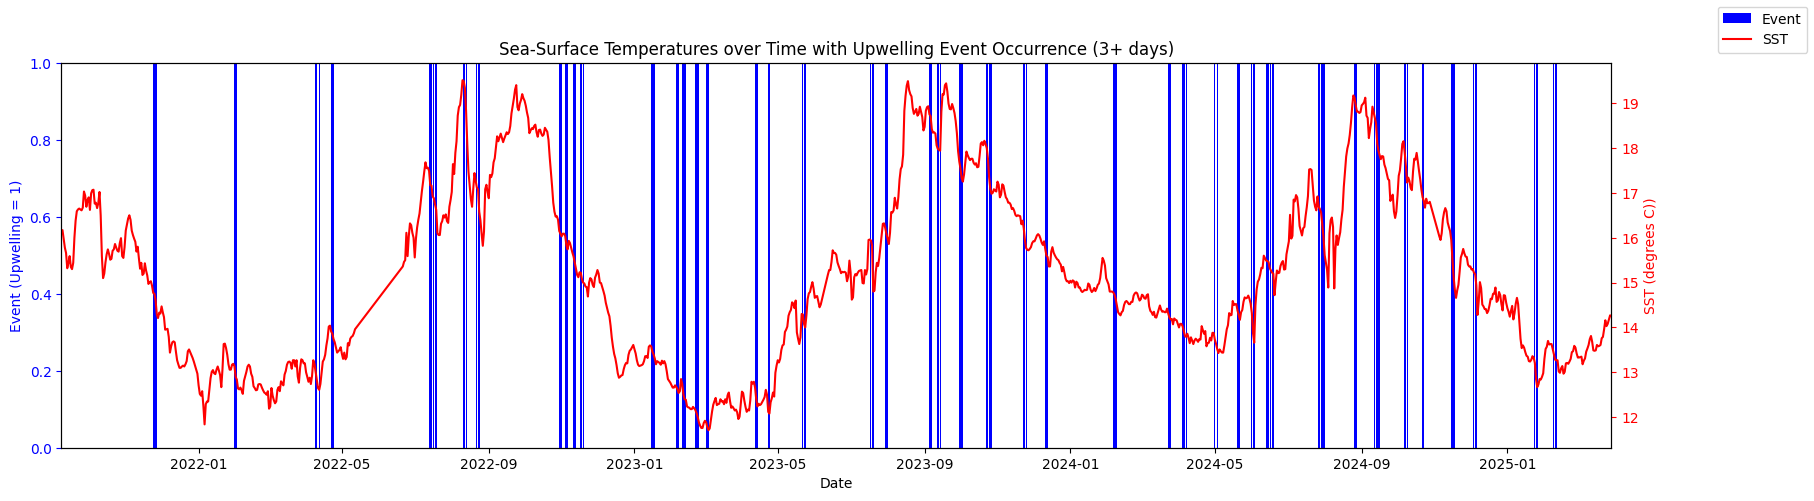

In [4]:
# Create plot to showcase occurrence of upwelling event occurrence 3+ days with temperature
fig, ax1 = plt.subplots(figsize=(20, 5))

ax1.bar(date, event, color = 'blue', label = 'Event')
ax1.set_xlabel('Date')
ax1.set_ylabel('Event (Upwelling = 1)', color = 'blue')
ax1.tick_params(axis = 'y', colors = 'blue')
ax1.set_xlim(np.min(date), np.max(date))
ax1.set_ylim(0,1)
ax2 = ax1.twinx()
ax2.plot(date, sst, color = 'red', label = 'SST')
ax2.set_ylabel('SST (degrees C))', color = 'red')
ax2.tick_params(axis = 'y', colors = 'red')
plt.title('Sea-Surface Temperatures over Time with Upwelling Event Occurrence (3+ days)')
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
fig.legend(lines_1 + lines_2, labels_1 + labels_2, loc = 'upper right')
plt.show()